#  Statistics in Python

In [2]:
import math
import statistics as stat

#data = [10,20,30,40,50,60,70,80]
data = [1,2,3,4,5]


In [5]:
print(sum(data) / len(data))
print(stat.mean(data))

3.0
3


In [6]:
if len(data) % 2 == 0:
    print((data[len(data) // 2] + data[len(data) // 2 - 1])/ 2)
else:
    print(data[len(data) // 2])
print(stat.median(data))

3
3


## Variance and Standard deviation

In [7]:
#Sample variance
sum_data = 0
for i  in range(len(data)):
  sum_data += data[i]                                  #Compute the sum of all data points, data[i] is the ith index value in the list
mean = sum_data / len(data)                            #Compute the mean where len(data) is the number of values in the list
sum_sq_diff = 0
for i in range(len(data)):
    sum_sq_diff += (data[i] - mean) ** 2
var = sum_sq_diff / (len(data) -1 )                    #Compute variance
std = math.sqrt(var)                                   #Compute standard deviation by taking the square root of variance

print("Manual variance:" , var)
print("Sample Variance:", stat.variance(data))

print("Manual standard deviation:", std)
print("Standard deviation:", stat.stdev(data))


Manual variance: 2.5
Sample Variance: 2.5
Manual standard deviation: 1.5811388300841898
Standard deviation: 1.5811388300841898


## Least square method

Slope (a): 8.4
Intercept (b): 11.6
Slope from matrix (a): 8.4
Intercept from matrix (b): 11.59999999999999


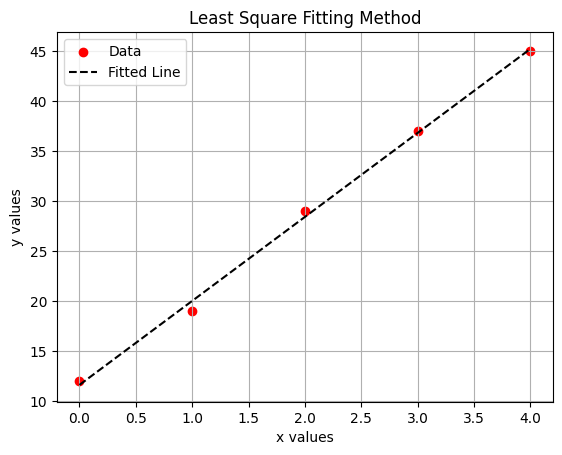

In [8]:
#Curve fitting to a straight line

import numpy as np
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,4])
y = np.array([12,19,29,37,45])
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x*y)
sum_xsquare = np.sum(x**2)
a, b = symbols('a b')
eq1 = Eq(n*b + a*sum_x - sum_y, 0)
eq2 = Eq(b*sum_x + a*sum_xsquare - sum_xy, 0)                   #define the two equations for linear curve fit
solution = solve((eq1, eq2), (a, b))                            #solve two equations using sympy module

print("Slope (a):", float(solution[a]))
print("Intercept (b):", float(solution[b]))

A = np.array([[sum_xsquare, sum_x],[sum_x, n]])
B = np.array([sum_xy, sum_y])
A_inv = np.linalg.inv(A)
p = np.dot(A_inv, B)                                           #solve two equations using matrix equation
print(f"Slope from matrix (a):",p[0])
print(f"Intercept from matrix (b):", p[1])
#print(f"Intercept from matrix (b): {p[1]:.4f}")

# Plot
plt.scatter(x, y, color='red', label='Data')
plt.plot(x, p[0]*x + p[1], 'k--', label='Fitted Line')

plt.title("Least Square Fitting Method")
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.grid(True)
plt.show()